<h1>Težinski grafovi u pythonu</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-4.17.19-1-MANJARO-x86_64-with-arch-Manjaro-Linux'

In [3]:
platform.python_version()

'3.7.0'

In [4]:
import networkx as nx

In [5]:
nx.__version__

'2.2'

In [6]:
from pylab import *

In [7]:
%matplotlib inline

In [8]:
import random

In [9]:
import DSTG

<h3>formiranje Petersenovog težinskog grafa s random težinama</h3>

In [10]:
G=nx.Graph()
G.add_weighted_edges_from((u,v,random.randint(1,8)) for u,v in nx.petersen_graph().edges())

#### ispisivanje bridova zajedno s njihovim težinama

In [11]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 2}), (0, 4, {'weight': 4}), (0, 5, {'weight': 5}), (1, 2, {'weight': 4}), (1, 6, {'weight': 1}), (4, 3, {'weight': 4}), (4, 9, {'weight': 5}), (5, 7, {'weight': 8}), (5, 8, {'weight': 6}), (2, 3, {'weight': 4}), (2, 7, {'weight': 4}), (6, 8, {'weight': 5}), (6, 9, {'weight': 1}), (3, 8, {'weight': 6}), (7, 9, {'weight': 4})])

#### dva načina spremanja težinskog grafa u datoteku

In [12]:
nx.write_edgelist(G,"tezinskiPetersen.edgelist")

In [13]:
nx.write_multiline_adjlist(G,"tezinskiPetersen.multiadjlist")

#### sadržaji pojedinih datoteka

In [14]:
dat=open("tezinskiPetersen.edgelist",'r')
print(dat.read())
dat.close()

0 1 {'weight': 2}
0 4 {'weight': 4}
0 5 {'weight': 5}
1 2 {'weight': 4}
1 6 {'weight': 1}
4 3 {'weight': 4}
4 9 {'weight': 5}
5 7 {'weight': 8}
5 8 {'weight': 6}
2 3 {'weight': 4}
2 7 {'weight': 4}
6 8 {'weight': 5}
6 9 {'weight': 1}
3 8 {'weight': 6}
7 9 {'weight': 4}



In [15]:
dat=open("tezinskiPetersen.multiadjlist",'r')
print(dat.read())
dat.close()

#/usr/lib/python3.7/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-f0e307fb-e78b-4e40-82c5-d1de0e9267d5.json
# GMT Sat Oct 20 11:08:23 2018
# 
0 3
1 {'weight': 2}
4 {'weight': 4}
5 {'weight': 5}
1 2
2 {'weight': 4}
6 {'weight': 1}
4 2
3 {'weight': 4}
9 {'weight': 5}
5 2
7 {'weight': 8}
8 {'weight': 6}
2 2
3 {'weight': 4}
7 {'weight': 4}
6 2
8 {'weight': 5}
9 {'weight': 1}
3 1
8 {'weight': 6}
7 1
9 {'weight': 4}
8 0
9 0



#### učitavanje težinskog grafa iz datoteke i pretvaranje vrhova u tip integer

In [16]:
Z1=nx.read_edgelist("tezinskiPetersen.edgelist",nodetype=int)

In [17]:
Z1

In [18]:
Z1.nodes()

NodeView((0, 1, 4, 5, 2, 6, 3, 9, 7, 8))

In [19]:
Z2=nx.read_multiline_adjlist("tezinskiPetersen.multiadjlist",nodetype=int)

In [20]:
Z2

In [21]:
Z2.nodes()

NodeView((0, 1, 4, 5, 2, 6, 3, 9, 7, 8))

## Učitavanje težinskog grafa iz datoteke s kojim ćemo dalje raditi

In [22]:
tezinskiGraf1=nx.read_edgelist("tezinskiGraf1.edgelist",nodetype=str)

#### crtanje težinskog grafa pomoću funkcije iz modula DSTG

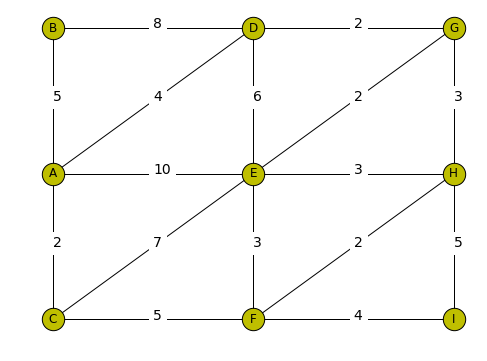

In [23]:
figure(figsize=(8,6))
DSTG.CrtajTezinskiGraf(tezinskiGraf1, pos={'A':(0,2),'B':(0,4),'C':(0,0),'D':(2,4),'E':(2,2),'F':(2,0),'G':(4,4),'H':(4,2),'I':(4,0)},
                      rubVrha='k',velicinaVrha=500,fontTezine=14)

#### težinska matrica

In [24]:
nx.to_pandas_adjacency(tezinskiGraf1,dtype=int)

A  B  C  D   E  F  G  H  I
A   0  5  2  4  10  0  0  0  0
B   5  0  0  8   0  0  0  0  0
C   2  0  0  0   7  5  0  0  0
D   4  8  0  0   6  0  2  0  0
E  10  0  7  6   0  3  2  3  0
F   0  0  5  0   3  0  0  2  4
G   0  0  0  2   2  0  0  3  0
H   0  0  0  0   3  2  3  0  5
I   0  0  0  0   0  4  0  5  0

In [25]:
nx.adj_matrix(tezinskiGraf1).todense()

matrix([[ 0,  5,  2,  4, 10,  0,  0,  0,  0],
        [ 5,  0,  0,  8,  0,  0,  0,  0,  0],
        [ 2,  0,  0,  0,  7,  5,  0,  0,  0],
        [ 4,  8,  0,  0,  6,  0,  2,  0,  0],
        [10,  0,  7,  6,  0,  3,  2,  3,  0],
        [ 0,  0,  5,  0,  3,  0,  0,  2,  4],
        [ 0,  0,  0,  2,  2,  0,  0,  3,  0],
        [ 0,  0,  0,  0,  3,  2,  3,  0,  5],
        [ 0,  0,  0,  0,  0,  4,  0,  5,  0]], dtype=int64)

#### najkraći put od vrha A do vrha E u težinskom grafu

In [26]:
nx.dijkstra_path(tezinskiGraf1,'A','E')

['A', 'D', 'G', 'E']

#### najkraći put od vrha A do vrha E u pripadnom netežinskom grafu (sve težine su jednake 1)

In [27]:
nx.shortest_path(tezinskiGraf1,'A','E')

['A', 'E']

#### duljina najkraćeg puta od vrha A do vrha E u težinskom grafu

In [28]:
nx.dijkstra_path_length(tezinskiGraf1,'A','E')

8

#### duljina najkraćeg puta od vrha A do vrha E u pripadnom netežinskom grafu

In [29]:
nx.shortest_path_length(tezinskiGraf1,'A','E')

1

#### najkraći put od vrha A do vrha H u težinskom grafu

In [30]:
nx.dijkstra_path(tezinskiGraf1,'A','H')

['A', 'D', 'G', 'H']

#### najkraći put od vrha A do vrha H u pripadnom netežinskom grafu (sve težine su jednake 1)

In [31]:
nx.shortest_path(tezinskiGraf1,'A','H')

['A', 'E', 'H']

#### duljina najkraćeg puta od vrha A do vrha H u težinskom grafu

In [32]:
nx.dijkstra_path_length(tezinskiGraf1,'A','H')

9

#### duljina najkraćeg puta od vrha A do vrha H u pripadnom netežinskom grafu

In [33]:
nx.shortest_path_length(tezinskiGraf1,'A','H')

2

#### svi najkraći putovi od vrha A prema svim ostalim vrhovima u težinskom grafu

In [34]:
nx.single_source_dijkstra_path(tezinskiGraf1,'A')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'D'],
 'E': ['A', 'D', 'G', 'E'],
 'F': ['A', 'C', 'F'],
 'G': ['A', 'D', 'G'],
 'H': ['A', 'D', 'G', 'H'],
 'I': ['A', 'C', 'F', 'I']}

#### svi najkraći putovi od vrha B prema svim ostalim vrhovima u težinskom grafu

In [35]:
nx.single_source_dijkstra_path(tezinskiGraf1,'B')

{'B': ['B'],
 'A': ['B', 'A'],
 'D': ['B', 'D'],
 'C': ['B', 'A', 'C'],
 'E': ['B', 'D', 'G', 'E'],
 'F': ['B', 'A', 'C', 'F'],
 'G': ['B', 'D', 'G'],
 'H': ['B', 'D', 'G', 'H'],
 'I': ['B', 'A', 'C', 'F', 'I']}

#### svi najkraći putovi od vrha A prema svim ostalim vrhovima u pripadnom netežinskom grafu

In [36]:
nx.single_source_shortest_path(tezinskiGraf1,'A')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'D'],
 'E': ['A', 'E'],
 'F': ['A', 'C', 'F'],
 'G': ['A', 'D', 'G'],
 'H': ['A', 'E', 'H'],
 'I': ['A', 'C', 'F', 'I']}

#### svi najkraći putovi od vrha B prema svim ostalim vrhovima u pripadnom netežinskom grafu

In [37]:
nx.single_source_shortest_path(tezinskiGraf1,'B')

{'B': ['B'],
 'A': ['B', 'A'],
 'D': ['B', 'D'],
 'C': ['B', 'A', 'C'],
 'E': ['B', 'A', 'E'],
 'G': ['B', 'D', 'G'],
 'F': ['B', 'A', 'C', 'F'],
 'H': ['B', 'A', 'E', 'H'],
 'I': ['B', 'A', 'C', 'F', 'I']}

#### duljine svih najkraćih putova od vrha A prema svim ostalim vrhovima u težinskom grafu

In [38]:
nx.single_source_dijkstra_path_length(tezinskiGraf1,'A')

{'A': 0, 'C': 2, 'D': 4, 'B': 5, 'G': 6, 'F': 7, 'E': 8, 'H': 9, 'I': 11}

#### duljine svih najkraćih putova od vrha B prema svim ostalim vrhovima u težinskom grafu

In [39]:
nx.single_source_dijkstra_path_length(tezinskiGraf1,'B')

{'B': 0, 'A': 5, 'C': 7, 'D': 8, 'G': 10, 'F': 12, 'E': 12, 'H': 13, 'I': 16}

#### duljine svih najkraćih putova od vrha A prema svim ostalim vrhovima u pripadnom netežinskom grafu

In [40]:
nx.single_source_shortest_path_length(tezinskiGraf1,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 2, 'H': 2, 'I': 3}

#### duljine svih najkraćih putova od vrha B prema svim ostalim vrhovima u pripadnom netežinskom grafu

In [41]:
nx.single_source_shortest_path_length(tezinskiGraf1,'B')

{'B': 0, 'A': 1, 'D': 1, 'C': 2, 'E': 2, 'G': 2, 'F': 3, 'H': 3, 'I': 4}

#### svi najkraći putovi i njihove duljine od vrha A do svih preostalih vrhova u težinskom grafu

In [42]:
nx.single_source_dijkstra(tezinskiGraf1,'A')

({'A': 0, 'C': 2, 'D': 4, 'B': 5, 'G': 6, 'F': 7, 'E': 8, 'H': 9, 'I': 11},
 {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'D': ['A', 'D'],
  'E': ['A', 'D', 'G', 'E'],
  'F': ['A', 'C', 'F'],
  'G': ['A', 'D', 'G'],
  'H': ['A', 'D', 'G', 'H'],
  'I': ['A', 'C', 'F', 'I']})

#### svi najkraći putovi i njihove duljine od vrha B do svih preostalih vrhova u težinskom grafu

In [43]:
nx.single_source_dijkstra(tezinskiGraf1,'B')

({'B': 0, 'A': 5, 'C': 7, 'D': 8, 'G': 10, 'F': 12, 'E': 12, 'H': 13, 'I': 16},
 {'B': ['B'],
  'A': ['B', 'A'],
  'D': ['B', 'D'],
  'C': ['B', 'A', 'C'],
  'E': ['B', 'D', 'G', 'E'],
  'F': ['B', 'A', 'C', 'F'],
  'G': ['B', 'D', 'G'],
  'H': ['B', 'D', 'G', 'H'],
  'I': ['B', 'A', 'C', 'F', 'I']})

#### najkraći putovi između svaka dva vrha u pripadnom netežinskom grafu

In [44]:
list(nx.all_pairs_shortest_path(tezinskiGraf1))

[('A',
  {'A': ['A'],
   'B': ['A', 'B'],
   'C': ['A', 'C'],
   'D': ['A', 'D'],
   'E': ['A', 'E'],
   'F': ['A', 'C', 'F'],
   'G': ['A', 'D', 'G'],
   'H': ['A', 'E', 'H'],
   'I': ['A', 'C', 'F', 'I']}),
 ('B',
  {'B': ['B'],
   'A': ['B', 'A'],
   'D': ['B', 'D'],
   'C': ['B', 'A', 'C'],
   'E': ['B', 'A', 'E'],
   'G': ['B', 'D', 'G'],
   'F': ['B', 'A', 'C', 'F'],
   'H': ['B', 'A', 'E', 'H'],
   'I': ['B', 'A', 'C', 'F', 'I']}),
 ('C',
  {'C': ['C'],
   'A': ['C', 'A'],
   'E': ['C', 'E'],
   'F': ['C', 'F'],
   'B': ['C', 'A', 'B'],
   'D': ['C', 'A', 'D'],
   'G': ['C', 'E', 'G'],
   'H': ['C', 'E', 'H'],
   'I': ['C', 'F', 'I']}),
 ('D',
  {'D': ['D'],
   'A': ['D', 'A'],
   'B': ['D', 'B'],
   'E': ['D', 'E'],
   'G': ['D', 'G'],
   'C': ['D', 'A', 'C'],
   'F': ['D', 'E', 'F'],
   'H': ['D', 'E', 'H'],
   'I': ['D', 'E', 'F', 'I']}),
 ('E',
  {'E': ['E'],
   'A': ['E', 'A'],
   'C': ['E', 'C'],
   'D': ['E', 'D'],
   'F': ['E', 'F'],
   'G': ['E', 'G'],
   'H': ['E', 'H'

#### najkraće udaljenosti između svaka dva vrha u pripadnom netežinskom grafu

In [45]:
list(nx.all_pairs_shortest_path_length(tezinskiGraf1))

[('A',
  {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 2, 'H': 2, 'I': 3}),
 ('B',
  {'B': 0, 'A': 1, 'D': 1, 'C': 2, 'E': 2, 'G': 2, 'F': 3, 'H': 3, 'I': 4}),
 ('C',
  {'C': 0, 'A': 1, 'E': 1, 'F': 1, 'B': 2, 'D': 2, 'G': 2, 'H': 2, 'I': 2}),
 ('D',
  {'D': 0, 'A': 1, 'B': 1, 'E': 1, 'G': 1, 'C': 2, 'F': 2, 'H': 2, 'I': 3}),
 ('E',
  {'E': 0, 'A': 1, 'C': 1, 'D': 1, 'F': 1, 'G': 1, 'H': 1, 'B': 2, 'I': 2}),
 ('F',
  {'F': 0, 'C': 1, 'E': 1, 'H': 1, 'I': 1, 'A': 2, 'D': 2, 'G': 2, 'B': 3}),
 ('G',
  {'G': 0, 'D': 1, 'E': 1, 'H': 1, 'A': 2, 'B': 2, 'C': 2, 'F': 2, 'I': 2}),
 ('H',
  {'H': 0, 'E': 1, 'F': 1, 'G': 1, 'I': 1, 'A': 2, 'C': 2, 'D': 2, 'B': 3}),
 ('I',
  {'I': 0, 'F': 1, 'H': 1, 'C': 2, 'E': 2, 'G': 2, 'A': 3, 'D': 3, 'B': 4})]

#### najkraći putovi između svaka dva vrha u težinskom grafu

In [46]:
list(nx.all_pairs_dijkstra_path(tezinskiGraf1))

[('A',
  {'A': ['A'],
   'B': ['A', 'B'],
   'C': ['A', 'C'],
   'D': ['A', 'D'],
   'E': ['A', 'D', 'G', 'E'],
   'F': ['A', 'C', 'F'],
   'G': ['A', 'D', 'G'],
   'H': ['A', 'D', 'G', 'H'],
   'I': ['A', 'C', 'F', 'I']}),
 ('B',
  {'B': ['B'],
   'A': ['B', 'A'],
   'D': ['B', 'D'],
   'C': ['B', 'A', 'C'],
   'E': ['B', 'D', 'G', 'E'],
   'F': ['B', 'A', 'C', 'F'],
   'G': ['B', 'D', 'G'],
   'H': ['B', 'D', 'G', 'H'],
   'I': ['B', 'A', 'C', 'F', 'I']}),
 ('C',
  {'C': ['C'],
   'A': ['C', 'A'],
   'E': ['C', 'E'],
   'F': ['C', 'F'],
   'B': ['C', 'A', 'B'],
   'D': ['C', 'A', 'D'],
   'H': ['C', 'F', 'H'],
   'I': ['C', 'F', 'I'],
   'G': ['C', 'A', 'D', 'G']}),
 ('D',
  {'D': ['D'],
   'A': ['D', 'A'],
   'B': ['D', 'B'],
   'E': ['D', 'G', 'E'],
   'G': ['D', 'G'],
   'H': ['D', 'G', 'H'],
   'C': ['D', 'A', 'C'],
   'F': ['D', 'G', 'E', 'F'],
   'I': ['D', 'G', 'H', 'I']}),
 ('E',
  {'E': ['E'],
   'A': ['E', 'G', 'D', 'A'],
   'C': ['E', 'C'],
   'D': ['E', 'G', 'D'],
   'F':

#### najkraće udaljenosti između svaka dva vrha u težinskom grafu

In [47]:
DSTG.ispis(list(nx.all_pairs_dijkstra_path_length(tezinskiGraf1)),80)

[('A', {'A': 0, 'C': 2, 'D': 4, 'B': 5, 'G': 6, 'F': 7, 'E': 8, 'H': 9, 'I': 11}
), ('B', {'B': 0, 'A': 5, 'C': 7, 'D': 8, 'G': 10, 'F': 12, 'E': 12, 'H': 13, 'I
': 16}), ('C', {'C': 0, 'A': 2, 'F': 5, 'D': 6, 'E': 7, 'B': 7, 'H': 7, 'G': 8, 
'I': 9}), ('D', {'D': 0, 'G': 2, 'A': 4, 'E': 4, 'H': 5, 'C': 6, 'F': 7, 'B': 8,
 'I': 10}), ('E', {'E': 0, 'G': 2, 'F': 3, 'H': 3, 'D': 4, 'C': 7, 'I': 7, 'A': 
8, 'B': 12}), ('F', {'F': 0, 'H': 2, 'E': 3, 'I': 4, 'C': 5, 'G': 5, 'A': 7, 'D'
: 7, 'B': 12}), ('G', {'G': 0, 'D': 2, 'E': 2, 'H': 3, 'F': 5, 'A': 6, 'I': 8, '
C': 8, 'B': 10}), ('H', {'H': 0, 'F': 2, 'E': 3, 'G': 3, 'I': 5, 'D': 5, 'C': 7,
 'A': 9, 'B': 13}), ('I', {'I': 0, 'F': 4, 'H': 5, 'E': 7, 'G': 8, 'C': 9, 'D': 
10, 'A': 11, 'B': 16})]


#### najkraće udaljenosti od vrha A prema svim preostalim vrhovima zajedno s listom svih mogućih prethodnika preko kojih je pojedini vrh mogao dobiti oznaku

In [48]:
nx.dijkstra_predecessor_and_distance(tezinskiGraf1,'A')

({'A': [],
  'B': ['A'],
  'C': ['A'],
  'D': ['A'],
  'E': ['G'],
  'F': ['C'],
  'G': ['D'],
  'H': ['G', 'F'],
  'I': ['F']},
 {'A': 0, 'C': 2, 'D': 4, 'B': 5, 'G': 6, 'F': 7, 'E': 8, 'H': 9, 'I': 11})

#### najkraće udaljenosti od vrha B prema svim preostalim vrhovima zajedno s listom svih mogućih prethodnika preko kojih je pojedini vrh mogao dobiti oznaku

In [49]:
nx.dijkstra_predecessor_and_distance(tezinskiGraf1,'B')

({'B': [],
  'A': ['B'],
  'D': ['B'],
  'C': ['A'],
  'E': ['G'],
  'F': ['C'],
  'G': ['D'],
  'H': ['G'],
  'I': ['F']},
 {'B': 0, 'A': 5, 'C': 7, 'D': 8, 'G': 10, 'F': 12, 'E': 12, 'H': 13, 'I': 16})

#### najkraće udaljenosti od vrha F prema svim preostalim vrhovima zajedno s listom svih mogućih prethodnika preko kojih je pojedini vrh mogao dobiti oznaku

In [50]:
nx.dijkstra_predecessor_and_distance(tezinskiGraf1,'F')

({'F': [],
  'C': ['F'],
  'E': ['F'],
  'H': ['F'],
  'I': ['F'],
  'G': ['H', 'E'],
  'A': ['C'],
  'D': ['G'],
  'B': ['A']},
 {'F': 0, 'H': 2, 'E': 3, 'I': 4, 'C': 5, 'G': 5, 'A': 7, 'D': 7, 'B': 12})

#### ista svih mogućih prethodnika preko kojih je pojedini vrh mogao dobiti oznaku u pripadnom netežinskom grafu gledajući najkraće putove od vrha A

In [51]:
nx.predecessor(tezinskiGraf1,'A')

{'A': [],
 'B': ['A'],
 'C': ['A'],
 'D': ['A'],
 'E': ['A'],
 'F': ['C', 'E'],
 'G': ['D', 'E'],
 'H': ['E'],
 'I': ['F', 'H']}

## Isticanje najkraćih putova na grafu

In [52]:
pozicije={'A':(0,2),'B':(0,4),'C':(0,0),'D':(2,4),'E':(2,2),'F':(2,0),'G':(4,4),'H':(4,2),'I':(4,0)}

#### istaknuti najkraći put između vrhova A i H

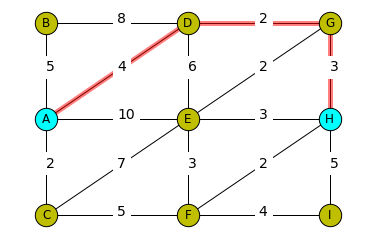

In [53]:
DSTG.CrtajNajkraciPut(tezinskiGraf1,pozicije,'A','H',velicinaVrha=500,fontTezine=14,rubVrha='k')

#### istaknuti najkraći put između vrhova A i E

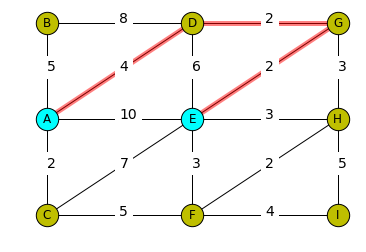

In [54]:
DSTG.CrtajNajkraciPut(tezinskiGraf1,pozicije,'A','E',velicinaVrha=500,fontTezine=14,rubVrha='k')

#### istaknuti najkraći put između vrhova A i H u pripadnom netežinskom grafu

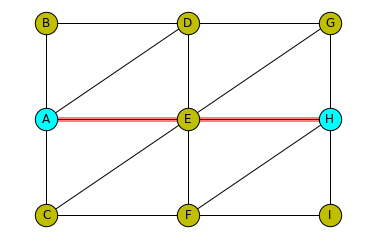

In [55]:
DSTG.CrtajNajkraciPut(tezinskiGraf1,pozicije,'A','H',velicinaVrha=500,rubVrha='k',tezine=False)

#### istaknuti najkraći put između vrhova A i E u pripadnom netežinskom grafu

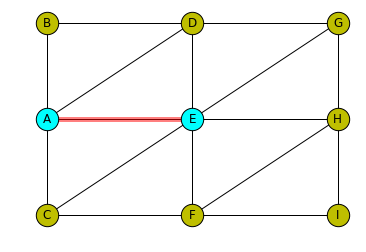

In [56]:
DSTG.CrtajNajkraciPut(tezinskiGraf1,pozicije,'A','E',velicinaVrha=500,rubVrha='k',tezine=False)

#### stablo najkraćih putova iz vrha A

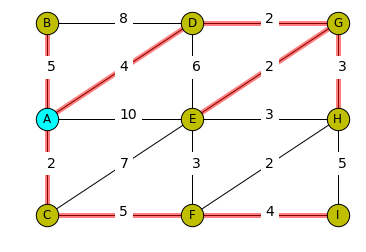

In [57]:
DSTG.StabloNajkracihPutova(tezinskiGraf1,pozicije,'A',velicinaVrha=500,fontTezine=14,rubVrha='k')

#### stablo najkraćih putova iz vrha B

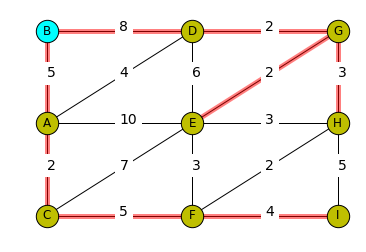

In [58]:
DSTG.StabloNajkracihPutova(tezinskiGraf1,pozicije,'B',velicinaVrha=500,fontTezine=14,rubVrha='k')

#### stablo najkraćih putova iz vrha A u pripadnom netežinskom grafu

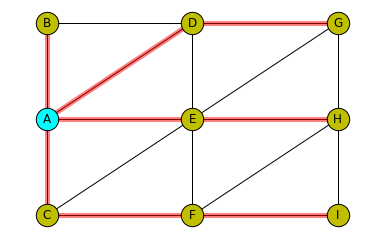

In [59]:
DSTG.StabloNajkracihPutova(tezinskiGraf1,pozicije,'A',velicinaVrha=500,rubVrha='k',tezine=False)

#### stablo najkraćih putova iz vrha B u pripadnom netežinskom grafu

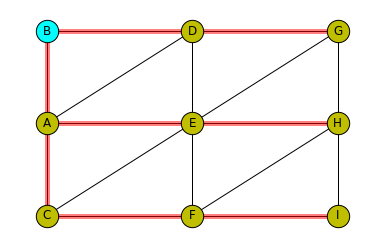

In [60]:
DSTG.StabloNajkracihPutova(tezinskiGraf1,pozicije,'B',velicinaVrha=500,rubVrha='k',tezine=False)

#### stablo najkraćih putova iz vrha A prikazano kao korijensko stablo s korijenom A

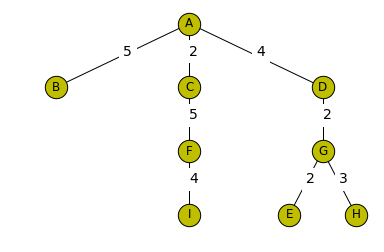

In [61]:
DSTG.KorijenskoStabloNajkracihPutova(tezinskiGraf1,'A',velicinaVrha=500,rubVrha='k',fontTezine=14)

#### stablo najkraćih putova iz vrha B prikazano kao korijensko stablo s korijenom B

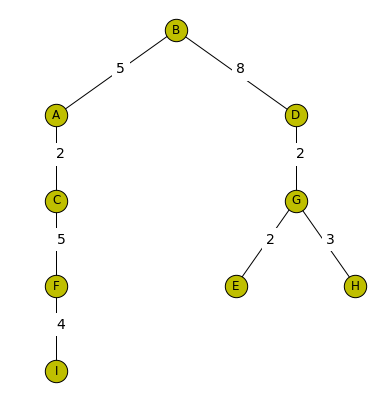

In [62]:
figure(figsize=(6,7))
DSTG.KorijenskoStabloNajkracihPutova(tezinskiGraf1,'B',velicinaVrha=500,rubVrha='k',fontTezine=14)

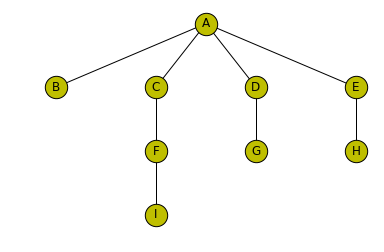

In [63]:
DSTG.KorijenskoStabloNajkracihPutova(tezinskiGraf1,'A',velicinaVrha=500,rubVrha='k',tezine=False)

## Ručni Dijkstra

#### ručno traženje najkraćih putova od vrha A prema ostalim vrhovima

In [64]:
DSTG.rucni_Dijkstra_graf(tezinskiGraf1,'A')

#### ručno traženje najkraćih putova od vrha B prema ostalim vrhovima

In [65]:
DSTG.rucni_Dijkstra_graf(tezinskiGraf1,'B')

## Floyd-Warshallov algoritam

#### najkraće udaljenosti između svaka dva vrha dane kao rječnik rječnika

In [66]:
nx.floyd_warshall(tezinskiGraf1)

{'A': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'A': 0,
              'B': 5,
              'C': 2,
              'D': 4,
              'E': 8,
              'F': 7,
              'G': 6,
              'H': 9,
              'I': 11}),
 'B': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'B': 0,
              'A': 5,
              'D': 8,
              'C': 7,
              'E': 12,
              'F': 12,
              'G': 10,
              'H': 13,
              'I': 16}),
 'C': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'C': 0,
              'A': 2,
              'E': 7,
              'F': 5,
              'B': 7,
              'D': 6,
              '

#### najkraće udaljenosti između svaka dva vrha dane kao numpy matrica

In [67]:
print(nx.floyd_warshall_numpy(tezinskiGraf1,nodelist=['A','B','C','D','E','F','G','H','I']))

[[ 0.  5.  2.  4.  8.  7.  6.  9. 11.]
 [ 5.  0.  7.  8. 12. 12. 10. 13. 16.]
 [ 2.  7.  0.  6.  7.  5.  8.  7.  9.]
 [ 4.  8.  6.  0.  4.  7.  2.  5. 10.]
 [ 8. 12.  7.  4.  0.  3.  2.  3.  7.]
 [ 7. 12.  5.  7.  3.  0.  5.  2.  4.]
 [ 6. 10.  8.  2.  2.  5.  0.  3.  8.]
 [ 9. 13.  7.  5.  3.  2.  3.  0.  5.]
 [11. 16.  9. 10.  7.  4.  8.  5.  0.]]


#### najkraće udaljenosti između svaka dva vrha i neposredni prethodnici pojedinog vrha na odgovarajućem najkraćem putu

In [68]:
DSTG.ispis(nx.floyd_warshall_predecessor_and_distance(tezinskiGraf1),80)

({'A': {'B': 'A', 'C': 'A', 'D': 'A', 'E': 'G', 'F': 'C', 'G': 'D', 'H': 'F', 'I
': 'F'}, 'B': {'A': 'B', 'D': 'B', 'C': 'A', 'E': 'G', 'F': 'C', 'G': 'D', 'H': 
'G', 'I': 'F'}, 'C': {'A': 'C', 'E': 'C', 'F': 'C', 'B': 'A', 'D': 'A', 'G': 'D'
, 'H': 'F', 'I': 'F'}, 'D': {'A': 'D', 'B': 'D', 'E': 'G', 'G': 'D', 'C': 'A', '
F': 'E', 'H': 'G', 'I': 'H'}, 'E': {'A': 'D', 'C': 'E', 'D': 'G', 'F': 'E', 'G':
 'E', 'H': 'E', 'B': 'D', 'I': 'F'}, 'F': {'C': 'F', 'E': 'F', 'H': 'F', 'I': 'F
', 'A': 'C', 'B': 'A', 'D': 'G', 'G': 'E'}, 'G': {'D': 'G', 'E': 'G', 'H': 'G', 
'A': 'D', 'B': 'D', 'C': 'A', 'F': 'E', 'I': 'H'}, 'H': {'E': 'H', 'F': 'H', 'G'
: 'H', 'I': 'H', 'A': 'C', 'B': 'D', 'C': 'F', 'D': 'G'}, 'I': {'F': 'I', 'H': '
I', 'A': 'C', 'B': 'A', 'C': 'F', 'D': 'G', 'E': 'F', 'G': 'H'}}, {'A': defaultd
ict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>
.<lambda> at 0x7f3a9b93a1e0>, {'A': 0, 'B': 5, 'C': 2, 'D': 4, 'E': 8, 'F': 7, '
G': 6, 'H': 9, 'I': 11}), 'B

### ručni Floyd-Warshallov algoritam

#### Nulti, treći, peti, sedmi i posljednji deveti korak Floyd-Warshallovog algoritma na težinskom grafu tezinskiGraf1

In [69]:
DSTG.FW(tezinskiGraf1,step=[0,3,5,7,9],ncol=3)

#### Isprobajmo našu funkciju na dva primjera iz prezentacije

In [70]:
F1=nx.Graph({"v1":{"v2":{'weight':2}},"v2":{"v3":{'weight':3}},"v3":{"v4":{'weight':1}}})

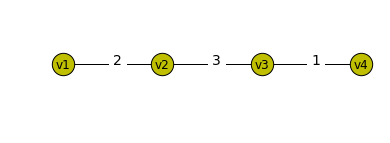

In [71]:
figure(figsize=(6,2))
DSTG.CrtajTezinskiGraf(F1,{'v1':(0,0),'v2':(1,0),'v3':(2,0),'v4':(3,0)},velicinaVrha=500,rubVrha='k',fontTezine=14)

In [72]:
DSTG.FW(F1,step=range(5),ncol=5)

In [73]:
F2=nx.Graph({"v1":{"v2":{'weight':15},"v3":{'weight':5},"v4":{'weight':1}},"v2":{"v3":{'weight':8},
            "v5":{'weight':3}},"v4":{"v5":{'weight':2}}})

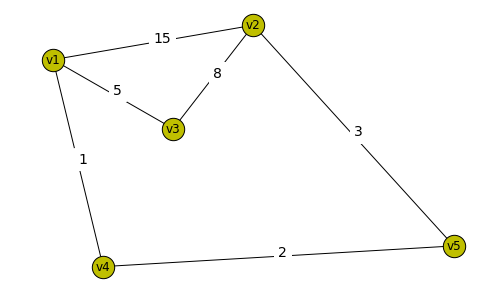

In [74]:
figure(figsize=(8,5))
DSTG.CrtajTezinskiGraf(F2,{"v1":(0,3),"v2":(2,3.5),"v3":(1.2,2),"v4":(0.5,0),"v5":(4,0.3)},velicinaVrha=500,rubVrha='k',fontTezine=14)

In [75]:
DSTG.FW(F2,step=range(6),ncol=3,redoslijed_vrhova=['v1','v2','v3','v4','v5'])